In [7]:
import torch
from pathlib import Path
import time
import os
import seaborn as sns

# Summary:



We can see that some parameters actually affect the inference time for the torchscript model. Not much however.

- os.environ['BLAS'] = 'MKL'
- 6 threads

## IMPORTANT!

Always make sure you restart the kernel before running a cell to get accurate results

In [2]:
model_path = Path('../../saved_models/emely_scripted_test.pt')

model = torch.jit.load(model_path)

### Creating a funciton to use for testing times

In [3]:
def test_time(n):
    s = 'HI emely, this is a test to see if you are any faster now than you used to be haha'
    start = time.time()

    for _ in range(n):
        model(s)

    average = (time.time() - start) / n 

    print(f'Average time was {average}')
    return average

## Test different configurations

## Intra op parallelism

- os['OMP_NUM_THREADS']
- os['MKL_NUM_THREADS']

In [4]:
torch.get_num_threads()

10

<AxesSubplot:>

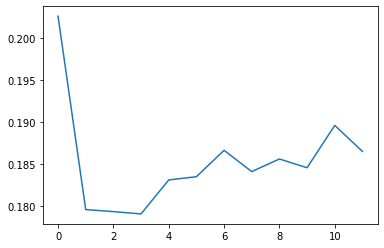

In [8]:
os.environ['BLAS'] = 'MKL'

    
thread_times = {}
for i in range(12):
    os.environ['MKL_NUM_THREADS'] = str(i)
    t = test_time(50)
    thread_times[i] = t
    
sns.lineplot(x = thread_times.keys(), y=thread_times.values())

## Set parallelization libraries

### Default (OMP)

In [4]:
test_time(50)

/home/marvin/miniconda3/envs/parlai/lib/python3.9/site-packages/torch/nn/modules/module.py:1051: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return forward_call(*input, **kwargs)


Average time was 0.2058199691772461


0.2058199691772461

### MKL

In [4]:
os.environ['BLAS'] = 'MKL'
test_time(50)

/home/marvin/miniconda3/envs/parlai/lib/python3.9/site-packages/torch/nn/modules/module.py:1051: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return forward_call(*input, **kwargs)


Average time was 0.20288559913635254


0.20288559913635254

### MLK DNN

In [6]:
os.environ['USE_MKLDNN'] = '1'
test_time(50)

/home/marvin/miniconda3/envs/parlai/lib/python3.9/site-packages/torch/nn/modules/module.py:1051: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return forward_call(*input, **kwargs)


Average time was 0.2049983787536621


0.2049983787536621

## Set number of threads in torch


In [10]:
!pip install seaborn

     |████████████████████████████████| 292 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 592 kB/s  eta 0:00:01
     |████████████████████████████████| 1.6 MB 10.4 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [11]:
import seaborn as sns

<AxesSubplot:>

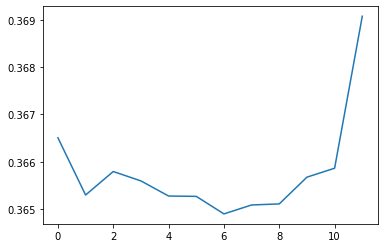

In [15]:
thread_times = {}
for i in range(12):
    torch.set_num_threads(1)
    t = test_time(50)
    thread_times[i] = t
    
sns.lineplot(x = thread_times.keys(), y=thread_times.values())

## Export to ONNX

- __ getstate__ method has to be extended for this to work 

In [17]:
dummy_input = 'Hi Emely, you are being exported to ONNX!'

torch.onnx.export(model, dummy_input, '../../saved_models/emely.onnx', verbose=True)

/home/marvin/miniconda3/envs/parlai/lib/python3.9/site-packages/torch/onnx/utils.py:341: UserWarning: Model has no forward function
  warnings.warn("Model has no forward function")


RuntimeError: 
Unknown type __torch__.parlai.torchscript.modules_emely.ScriptableDictionaryAgent (of Python compilation unit at: 0x55c473425ad0) encountered in handling model params. This class type does not extend __getstate__ method.:
